In [7]:
%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import astro_parser
import re
import requests
from bs4 import BeautifulSoup

In [8]:
url = "http://www.astrochymist.org/astrochymist_ism.html"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'lxml')  # Parse the HTML as a string

table = soup.find_all('table')[2]            # Grab the third table, which contains the molecules

In [42]:
for index, row in enumerate(table.find_all("tr")[1:]):
    if index == 0:
        print(list(row.find_all(["th", "td"])[1].contents[0].stripped_strings))

['CH', 'methylidyne']


In [2]:
parser = re.compile(r"\b([A-Z][a-z]{0,2}\d{0,3})+")

# Parsing the Astrochymist

## Game plan

The table of detections are found in the second table on the page. The basic idea behind the code is to loop through every row of the table, snagging every column and parsing the data one column at a time.

One of the major "hacks" involves parsing all `<th>` and `<td>` columns - the HTML is written such that these are exchanged sometimes and as a result you can't parse things with indexing reliably. By getting by types, you end up with a list in the correct order (fortuitiously...).

Additionally, there are some rows which are continuation of the previous row. These are checked by making sure that the molecule column (column 2) does not start with a number. Finally, rows of molecules with disputed detections are picked up by the fact that there are only three columns.

In [3]:
df = astro_parser.main()

CHmethylidyne
CNcyano radical
CH+methylidyne cation
OHhydroxyl radical
NH3ammonia
H2Owater
H2COformaldehyde
COcarbon monoxide
H2hydrogen
HCO+formyl cation
CH3OHmethanol
HC3Ncyanoacetylene
HCNhydrogen cyanide
HCOOHformic acid
SiOsilicon monoxide
CScarbon monosulfide
CH3CNmethyl cyanide
OCScarbonyl sulfide
NH2CHOformamide
HNChydrogen isocyanide
H2Shydrogen sulfide
HNCOisocyanic acid
CH3CHOacetaldehyde
CH3CCHmethylacetylene
CH2NHmethanimine
H2CSthioformaldehyde
SOsulfur monoxide
CH3OCH3dimethyl ether
CH3NH2methylamine
N2H+protonated nitrogen
C2Hethynyl radical
CH2CHCNvinylcyanide
CH3CH2OHethanol
HCOOCH3methyl formate
SO2sulfur dioxide
SiSsilicon monosulfide
NSnitrogen monosulfide
NH2CNcyanamide
HC5Ncyanodiacetylene
HCOformyl radical
C2H2acetylene
C3Ncyanoethynyl radical
H2CCOketene
C2dicarbon
HNOnitrosyl hydride
CH3CH2CN
HC7Ncyanotriacetylene
HC9Ncyanotetraacetylene
C4Hbutadiynyl radical
NOnitric oxide
OCN–cyanate
CH3SHmethyl mercaptan
HNCSisothiocyanic acid
C2H4ethylene
HCS+
HOCO+
HOC+
C

In [4]:
with pd.option_context("display.max_rows",400):
    display(df)

,Year,Molecule,Authors,Source,Detection Method
0,1937,CHmethylidyne,"[P Swings, L Rosenfeld, A McKellar, S Adams, H...",ζ Oph,"[Radio, UV/Vis]"
1,1940,CNcyano radical,"[A McKellar, S Adams, B Jefferts, A Penzias, W...",ζ Oph,"[Radio, UV/Vis]"
2,1941,CH+methylidyne cation,"[E Douglas, G Herzberg, T Dunham, S Adams]","ζ Oph, ξ Per, χ2 Ori, 55 Cyg",[UV/Vis]
3,1963,OHhydroxyl radical,"[S Weinreb, H Barrett, L Meeks, C Henry]",Cas A,[Radio]
4,1968,NH3ammonia,"[C Cheung, M Rank, H Townes, D Thornton, J Welch]",galactic center,[Radio]
5,1969,H2Owater,"[C Cheung, M Rank, H Townes, D Thornton, J Welch]","Sgr B2, Orion nebula, W49",[Radio]
6,1969,H2COformaldehyde,"[E Snyder, D Buhl, B Zuckerman, P Palmer]",Numerous sources,[Radio]
7,1970,COcarbon monoxide,"[W Wilson, B Jefferts, A Penzias, P Solomon, B...","Orion nebula, IRC +10216","[Radio, UV/Vis]"
8,1970,H2hydrogen,[R Carruthers],Persei,[UV/Vis]
9,1970,HCO+formyl cation,"[D Buhl, E Snyder]","Orion, W51, W3(OH), L134, Sgr A(NH3A)",[Radio]


In [5]:
df.tail(10)

,Year,Molecule,Authors,Source,Detection Method
225,2019,CaNCcalcium isocyanide,"[J Cernicharo, L Velilla, M Agúndez, R Pardo, ...",IRC +10216,[Radio]
226,2019,(NH2)2COurea,"[A Belloche, T Garrod, P Müller, M Menten, I M...",Sgr B2(N),[Radio]
227,2019,MgC3N,"[J Cernicharo, C Cabezas, R Pardo, M Agúndez, ...",IRC +10216,[Radio]
228,2019,MgC4H,"[J Cernicharo, C Cabezas, R Pardo, M Agúndez, ...",IRC +10216,[Radio]
229,2020,NH2OH,"[M Rivilla, J Martín, I Jiménez, S Martín, F R...",G+0.693-0.027,[Radio]
230,2020,CH3COCH2OH,"[Y Zhou, H Quan, X Zhang]",IRAS 16293-2422 B,[Radio]
231,2020,HNCHCCH,"[L Bizzocchi, D Prudenzano, M Rivilla, A Pietr...",G+0.693-0.027,[Radio]
232,2020,HC4NC,"[R Willis, A Loomis, M Burkhardt, N Shingledec...",TMC-1,[Radio]
233,2020,HCCCH2CN,"[A McGuire, M Burkhardt, A Loomis, N Shinglede...",TMC-1,[Radio]
234,2020,HC3O+,"[J Cernicharo, N Marcelino, M Agúndez, Y Endo,...",TMC-1,[Radio]


## Timeseries analysis

Iterate over the rows of the dataframe, and make cumulative histograms of detections by the three observations.

In [11]:
time_df = df.groupby(["Year"]).count()

In [14]:
cumulative = np.cumsum(time_df["Molecule"])

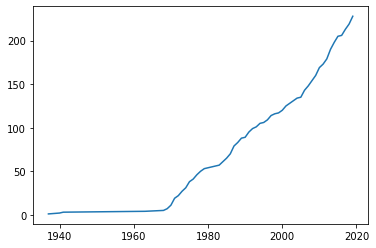

In [16]:
fig, ax = plt.subplots()

ax.plot(cumulative.index, cumulative)

In [5]:
timedf = pd.DataFrame(timedata, columns=["Year", "UV/Vis", "Radio", "IR", "Total"])